# **Used Bike Prices -Analysis**

In [108]:
#importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [142]:
#importing dataset
bikes = pd.read_csv("C:/Users/shikh/Downloads/bikes.csv",
                    dtype = ({'model_year':'int16',}),
                    na_values = ['\n\n','nan','0']
                   
                   )
bikes.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500.0
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000.0
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000.0
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000.0
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500.0


In [143]:
# checking null values
bikes.isna().sum()

model_name     0
model_year     0
kms_driven     0
owner          0
location      19
mileage       11
power         31
price         31
dtype: int64

In [144]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   model_name  7857 non-null   object 
 1   model_year  7857 non-null   int16  
 2   kms_driven  7857 non-null   object 
 3   owner       7857 non-null   object 
 4   location    7838 non-null   object 
 5   mileage     7846 non-null   object 
 6   power       7826 non-null   object 
 7   price       7826 non-null   float64
dtypes: float64(1), int16(1), object(6)
memory usage: 445.2+ KB


## **Data Cleaning & Preprocessing**

In [145]:
bikes['kms_driven'] = bikes['kms_driven'].str.extract(r'(\d+)', expand=False).astype("float32")


In [146]:
bikes['mileage']= bikes['mileage'].astype(str)
bikes['mileage'] = bikes['mileage'].astype(str).str.extract(r'(\d+\.?\d*)', expand=False).astype(float)

In [147]:
bikes['power'] = bikes['power'].astype(str).str.extract(r'(\d+\.?\d*)', expand=False).astype(float)

In [148]:
# dropping values where location is na
bikes.dropna(subset = ['location'], inplace = True)
bikes

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000.0,first owner,hyderabad,35.0,19.0,63500.0
1,Royal Enfield Classic 350cc 2016,2016,50000.0,first owner,hyderabad,35.0,19.8,115000.0
2,Hyosung GT250R 2012,2012,14795.0,first owner,hyderabad,30.0,28.0,300000.0
3,Bajaj Dominar 400 ABS 2017,2017,28.0,first owner,pondicherry,28.0,34.5,100000.0
4,Jawa Perak 330cc 2020,2020,2000.0,first owner,bangalore,NaN,30.0,197500.0
...,...,...,...,...,...,...,...,...
7852,Yamaha YZF-R15 150cc 2011,2011,7000.0,first owner,agra,42.0,16.0,55000.0
7853,Bajaj Discover 100cc 2015,2015,80.0,first owner,delhi,80.0,7.7,28000.0
7854,Bajaj Pulsar 180cc 2016,2016,6407.0,first owner,bangalore,65.0,17.0,61740.0
7855,Bajaj V15 150cc 2016,2016,7524.0,first owner,bangalore,57.0,11.8,49000.0


In [149]:
bikes.describe().round()

,model_year,kms_driven,mileage,power,price
count,7838.0,7835.0,7066.0,7807.0,7807.0
mean,2015.0,17262.0,45.0,21.0,107322.0
std,4.0,26780.0,17.0,15.0,139169.0
min,1950.0,0.0,5.0,6.0,2000.0
25%,2014.0,104.0,35.0,14.0,42700.0
50%,2016.0,11000.0,40.0,19.0,75000.0
75%,2018.0,25000.0,57.0,24.0,125000.0
max,2021.0,1000000.0,104.0,197.0,3000000.0


## Univariate analysis

In [150]:
# most expensive used bike
bikes['price'].describe().round().loc['max']

3000000.0

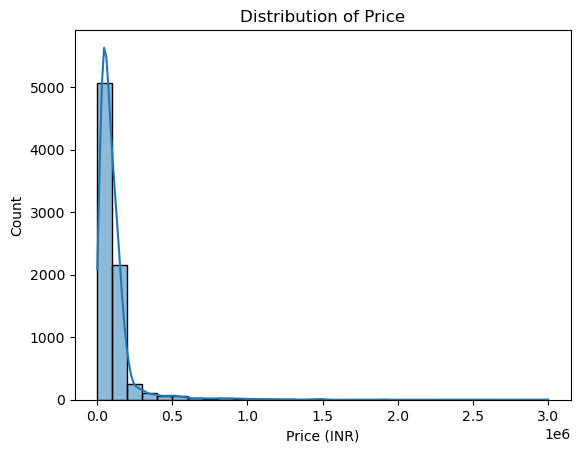

In [151]:
# Price distribution
sns.histplot(bikes['price'], bins=30, kde=True)
plt.title('Distribution of Price')
plt.xlabel('Price (INR)')
plt.show()

 #### Categorical Columns

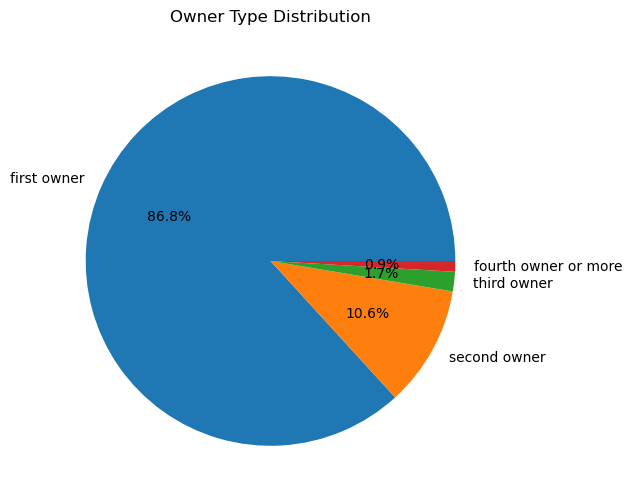

In [152]:
bikes['owner'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6))
plt.title('Owner Type Distribution')
plt.ylabel('')
plt.show()

<Axes: xlabel='location'>

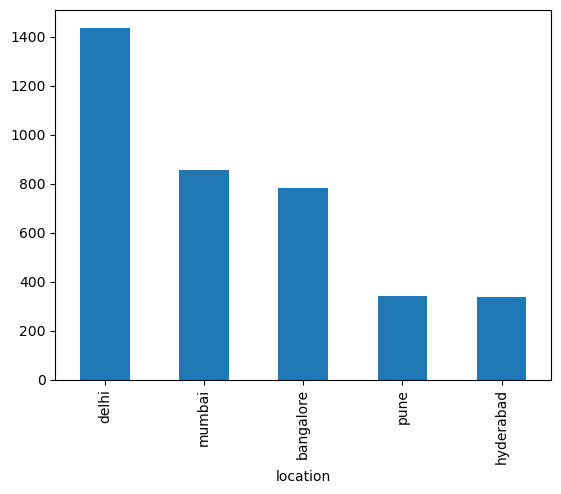

In [165]:
bikes['location'].value_counts(ascending = False).iloc[0:5].plot.bar()

<Axes: xlabel='model_year'>

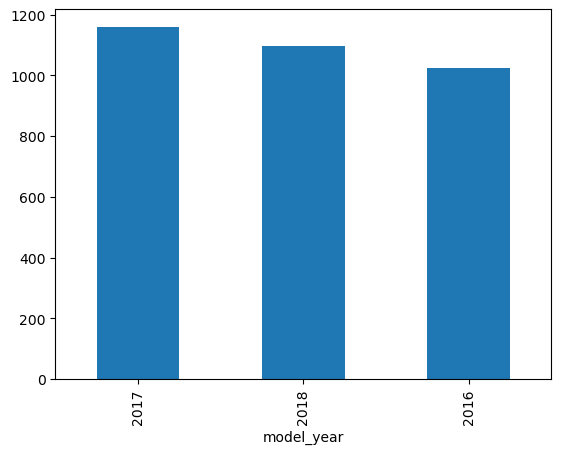

In [158]:
bikes['model_year'].value_counts().iloc[0:3].plot.bar()

## **Multivariate Analysis**




<Axes: xlabel='kms_driven', ylabel='price'>

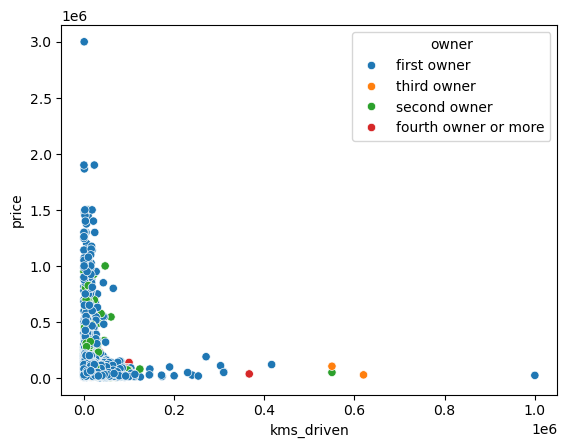

In [166]:
sns.scatterplot(x='kms_driven', y='price', hue='owner', data=bikes)

C:\Users\shikh\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


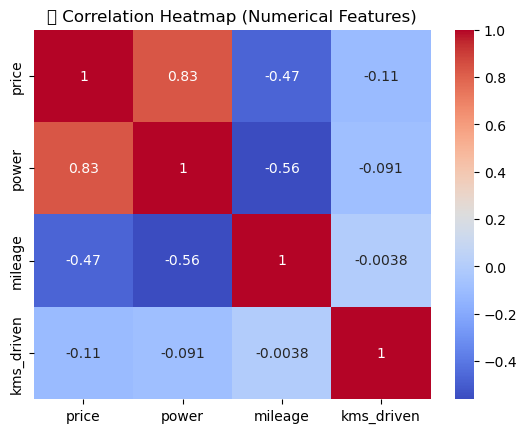

In [169]:
num_cols = ['price', 'power', 'mileage', 'kms_driven']
cat_cols = ['owner', 'location', 'brand']

sns.heatmap(bikes[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("📊 Correlation Heatmap (Numerical Features)")
plt.show()

C:\Users\shikh\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


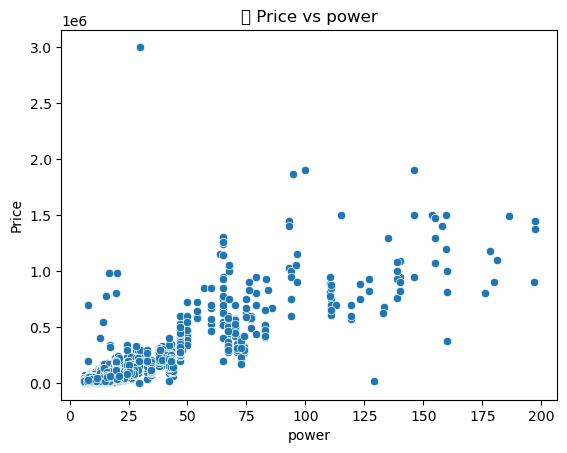

C:\Users\shikh\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


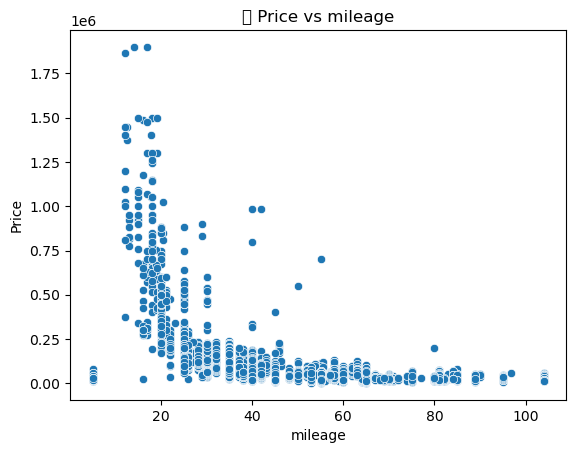

C:\Users\shikh\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


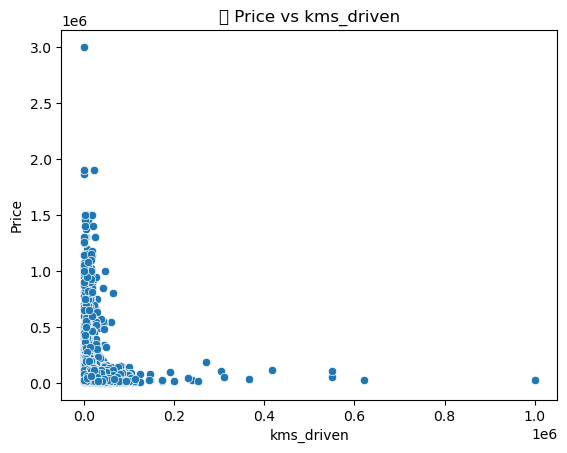

In [171]:
#Scatter Plots: Price vs Other Numeric Columns
for col in ['power', 'mileage', 'kms_driven']:
    sns.scatterplot(data=bikes, x=col, y='price')
    plt.title(f"💰 Price vs {col}")
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()


C:\Users\shikh\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


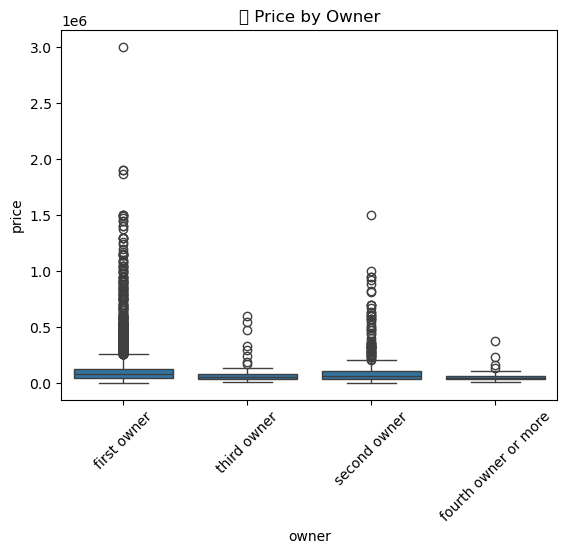

C:\Users\shikh\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


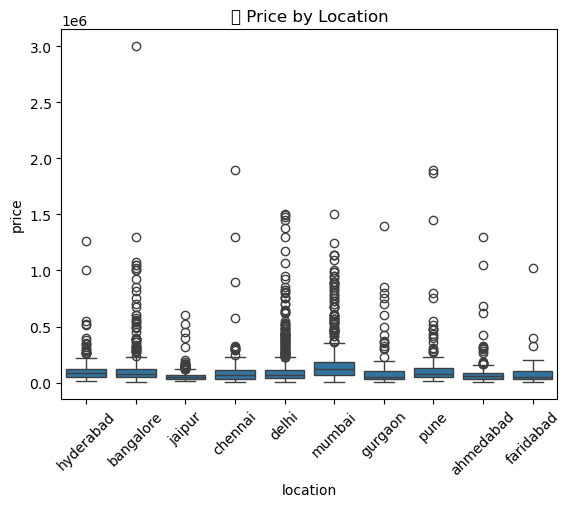

In [177]:
 #Boxplots: Price by Categorical Variables
for col in ['owner', 'location']:
    top_values = bikes[col].value_counts().nlargest(10).index
    sns.boxplot(x=col, y='price', data=bikes[bikes[col].isin(top_values)])
    plt.title(f"💰 Price by {col.capitalize()}")
    plt.xticks(rotation=45)
    plt.show()

<Axes: xlabel='power', ylabel='price'>

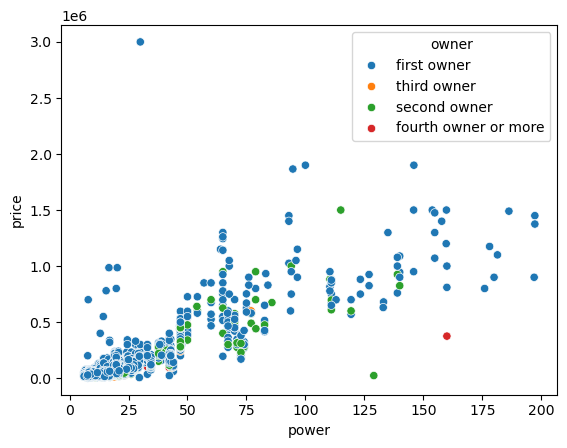

In [179]:

sns.scatterplot(x='power', y='price', hue='owner', data=bikes)

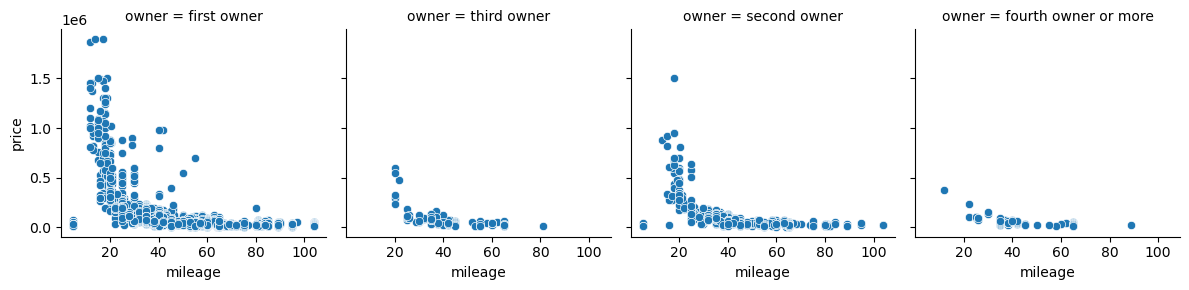

In [180]:
g = sns.FacetGrid(bikes, col="owner")
g.map(sns.scatterplot, "mileage", "price")

## **Feature Engineering**

In [181]:
#Bike Age
from datetime import datetime
current_year = datetime.now().year
bikes['bike_age'] = current_year - bikes['model_year']


In [183]:
# Fuel Efficiency
def mileage_bucket(m):
    if m < 30:
        return 'Low'
    elif m < 45:
        return 'Medium'
    else:
        return 'High'

In [185]:
bikes['mileage'] = pd.to_numeric(bikes['mileage'], errors='coerce')
bikes['mileage_class'] = bikes['mileage'].apply(mileage_bucket)
bikes.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,bike_age,mileage_class
0,Bajaj Avenger Cruise 220 2017,2017,17000.0,first owner,hyderabad,35.0,19.0,63500.0,8,Medium
1,Royal Enfield Classic 350cc 2016,2016,50000.0,first owner,hyderabad,35.0,19.8,115000.0,9,Medium
2,Hyosung GT250R 2012,2012,14795.0,first owner,hyderabad,30.0,28.0,300000.0,13,Medium
3,Bajaj Dominar 400 ABS 2017,2017,28.0,first owner,pondicherry,28.0,34.5,100000.0,8,Low
4,Jawa Perak 330cc 2020,2020,2000.0,first owner,bangalore,NaN,30.0,197500.0,5,High


## **Grouped Analysis**

In [190]:
# Which 5 models tend to have higher resale values?
bikes.groupby('model_name')['price'].mean().sort_values(ascending=False).iloc[0:5]

model_name
Indian Chief Classic 1800cc 2015          1900000.0
Triumph Rocket III Roadster 2016          1900000.0
Moto Guzzi Audace 1380cc 2020             1866057.0
Ducati XDiavel 1262CC S 2017              1500000.0
Harley-Davidson Night Rod Special 2015    1500000.0
Name: price, dtype: float64

In [193]:
#Which 5 models are more fuel-efficient on average?
bikes.groupby('model_name')['mileage'].mean().sort_values(ascending=False).iloc[0:5]

model_name
Bajaj Platina 100cc 2013    104.0
Bajaj Platina 100cc 2017    104.0
Bajaj Platina 100cc 2010    104.0
Bajaj Platina 100cc 2009    104.0
Bajaj Platina 100cc 2007    104.0
Name: mileage, dtype: float64

In [196]:
#Average Price by Owner Type
bikes.groupby('owner')['price'].mean().sort_values(ascending = False)

owner
first owner             109513.826787
second owner             98526.687198
third owner              75718.067164
fourth owner or more     61718.068493
Name: price, dtype: float64

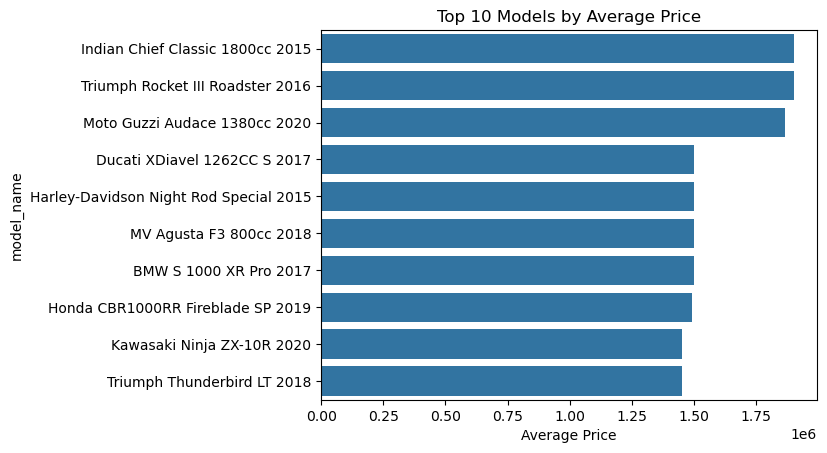

In [201]:
## top 10 Models by avg price
avg_price = bikes.groupby('model_name')['price'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=avg_price.values, y=avg_price.index)
plt.title("Top 10 Models by Average Price")
plt.xlabel("Average Price")
plt.ylabel("model_name")
plt.show()